## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington

<i>Optional: Refer to 0_source_data.ipynb to see how files were obtained from source and prepared</i>


### Notebook "1_eda" Purpose: 
<ol>
    <li><b>Combines the annual files</b> with tickets by year provided on Git into one central file to be loaded and used for analysis </li>
    <li>Performs initial <b>EDA</b> to discover fields, values, and preliminary analysis </li> 
    <li><b>Feature engineering</b> for data types, days to close ticket</li>
</ol> 

### Data Source Notes:

<b>MyLA 311 System Source (for Context): </b>

https://myla311.lacity.org/

<b>Data Files: </b>

https://data.lacity.org/browse?q=myla311+service+request+data

<b>Field Descriptions</b> ( “Columns” section located near bottom of page): 

https://data.lacity.org/City-Infrastructure-Service-Requests/MyLA311-Service-Request-Data-2020/rq3b-xjk8/about_data


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np

In [54]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

#### Combine years into one file

In [55]:
df_2019 = pd.read_csv(annual_data_path+'homeless_camp_closed_2019.csv', low_memory=False)
df_2020 = pd.read_csv(annual_data_path+'homeless_camp_closed_2020.csv', low_memory=False)
df_2021 = pd.read_csv(annual_data_path+'homeless_camp_closed_2021.csv', low_memory=False)
df_2022 = pd.read_csv(annual_data_path+'homeless_camp_closed_2022.csv', low_memory=False)
df_2023 = pd.read_csv(annual_data_path+'homeless_camp_closed_2023.csv', low_memory=False)
df_2024 = pd.read_csv(annual_data_path+'homeless_camp_closed_2024.csv', low_memory=False)



In [5]:
combined_df = pd.concat([df_2019, df_2020, df_2021, df_2022, df_2023, df_2024])

In [6]:
combined_df.to_csv(generated_data_path+'homeless_camp_closed_all.csv', index=False)

## EDA - Familiarity
#### Important Prequisite: Must have file ready from steps above before proceeding
<li>Optionally, use notebook "0_source_data_prep.ipynb" to process source data files</li>
<li> Generate one central location for data used below </li>
<li>File needed: "/Datasets/homeless_camp_closed_all.csv" </li>

In [56]:
df  = pd.read_csv(generated_data_path  + "homeless_camp_closed_all.csv", low_memory=False)      
# load from CSV generated above


In [9]:
print(df.shape)        # (rows, columns)
#print(df.tail())       # Last 5 rows
#print(df.columns)      # List of column names


(322186, 34)


In [10]:
print(df.info())       # Summary of the DataFrame (types, non-null counts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322186 entries, 0 to 322185
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SRNumber                   322186 non-null  object 
 1   CreatedDate                322186 non-null  object 
 2   UpdatedDate                322186 non-null  object 
 3   ActionTaken                322186 non-null  object 
 4   Owner                      322186 non-null  object 
 5   RequestType                322186 non-null  object 
 6   Status                     322186 non-null  object 
 7   RequestSource              322186 non-null  object 
 8   CreatedByUserOrganization  274036 non-null  object 
 9   MobileOS                   166337 non-null  object 
 10  Anonymous                  322186 non-null  object 
 11  AssignTo                   322119 non-null  object 
 12  ServiceDate                316993 non-null  object 
 13  ClosedDate                 32

In [11]:
# Basic statistics for numeric columns
print(df.describe().transpose())   


                count         mean          std         min          25%  \
HouseNumber  247144.0  6017.303661  5645.398214    1.000000  1250.000000   
Latitude     321906.0    34.094475     0.098568   33.706047    34.031198   
Longitude    321906.0  -118.368657     0.105433 -118.666666  -118.444255   
TBMPage      321905.0   604.201507    70.822852  480.000000   560.000000   
TBMRow       321905.0     4.072543     1.946344    1.000000     2.000000   
CD           321904.0     7.844469     4.319769    1.000000     4.000000   
NC           320089.0    54.856746    33.170282    0.000000    25.000000   

                     50%          75%           max  
HouseNumber  4506.000000  9361.000000  56010.000000  
Latitude       34.075570    34.173099     34.334335  
Longitude    -118.356736  -118.282547   -118.157825  
TBMPage       631.000000   634.000000   4724.000000  
TBMRow          4.000000     6.000000      7.000000  
CD              8.000000    12.000000     15.000000  
NC           

In [12]:
#Validate we only have homeless encampment types
status_counts = df["RequestType"].value_counts()
print(status_counts)

RequestType
Homeless Encampment    322186
Name: count, dtype: int64


In [13]:
#Validate we only have closed tickets
status_counts = df["Status"].value_counts()
print(status_counts)

Status
Closed    322186
Name: count, dtype: int64


In [16]:
#Explore other values
action_counts = df["ActionTaken"].value_counts()
print (action_counts)

ActionTaken
SR Created                321927
SR Updated                   215
Escalate to Supervisor        23
Transferred                   15
Information Provided           5
Status Provided                1
Name: count, dtype: int64


In [17]:
df["PolicePrecinct"].value_counts()             

PolicePrecinct
PACIFIC             26461
NORTH HOLLYWOOD     24248
OLYMPIC             22868
RAMPART             21972
NEWTON              19822
HOLLYWOOD           18825
TOPANGA             18573
WILSHIRE            17944
FOOTHILL            16169
WEST LOS ANGELES    15085
VAN NUYS            14263
NORTHEAST           13846
DEVONSHIRE          13428
MISSION             13339
WEST VALLEY         11935
HOLLENBECK          10894
77TH STREET         10667
CENTRAL              9620
SOUTHWEST            8348
SOUTHEAST            7489
HARBOR               6109
Name: count, dtype: int64

<Axes: xlabel='PolicePrecinct'>

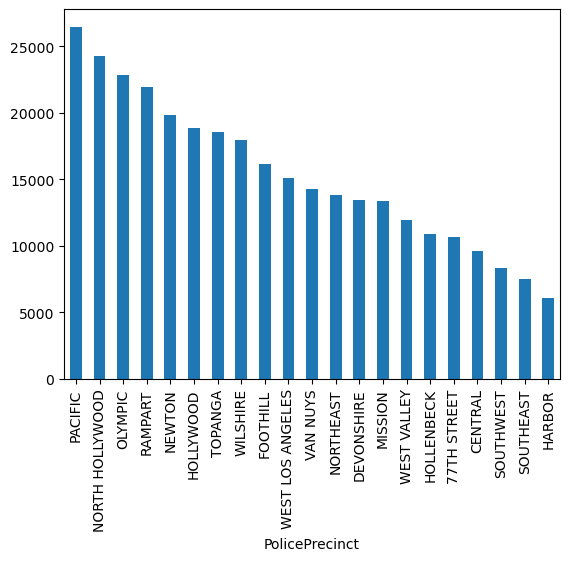

In [27]:
df["PolicePrecinct"].value_counts().plot.bar()  

In [6]:

#print( df["CD"].value_counts()    )
print( df["CDMember"].value_counts()    )
#print( df["NC"].value_counts()    )
print()
print( df["NCName"].value_counts()    )
 

CDMember
Bob Blumenfield            24431
Paul Krekorian             24040
Mitch O'Farrell            22154
Curren D. Price Jr.        21420
Mike Bonin                 19887
Nury Martinez              16166
Paul Koretz                15518
Kevin de León              15368
Monica Rodriguez           14449
John Lee                   12873
Marqueece Harris-Dawson    12678
Gilbert Cedillo            12007
Hugo Soto-Martinez         11983
Nithya Raman               11417
Eunisses Hernandez         10818
Heather Hutt                9321
Traci Park                  9317
Jose Huizar                 8840
Katy Yaroslavsky            8614
David Ryu                   8578
Herb J. Wesson Jr.          7391
Imelda Padilla              5875
Joe Buscaino                5727
Mark Ridley-Thomas          3577
Office of District 10       3217
Tim McOsker                 3103
Vacant                      1513
Greig Smith                 1185
Adrin Nazarian               198
Ysabel J. Jurado             125
M

APC
Central APC              92140
South Valley APC         66115
South Los Angeles APC    47439
North Valley APC         45805
West Los Angeles APC     39794
East Los Angeles APC     23753
Harbor APC                6859
Name: count, dtype: int64


<Axes: xlabel='APC'>

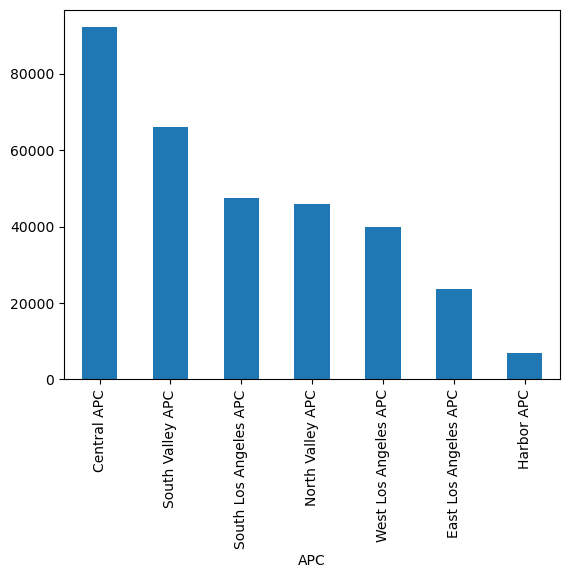

In [28]:
print( df["APC"].value_counts()    )
df["APC"].value_counts().plot.bar()  

In [22]:
df["ClosedDate"].head()

0    01/14/2020 07:51:00 AM
1    01/08/2020 01:42:00 PM
2    01/21/2020 08:49:00 AM
3    01/21/2020 09:05:00 AM
4    01/21/2020 09:10:00 AM
Name: ClosedDate, dtype: object

### Feature Engineering
<li>Convert Create and Closed Dates from String to Datetime</li>
<li>Add Create Year</li>
<li>Add Days to Close Ticket (Closed Date - Create Date</li>

In [57]:
#Feature engineering Create date to date type (not string)
# Convert string to datetime using strptime

df["ClosedDate_DT"] = pd.to_datetime(df["ClosedDate"], format="%m/%d/%Y %H:%M:%S %p")


In [58]:
print ( min(df["ClosedDate_DT"]) )
print ( max(df["ClosedDate_DT"]) )

2019-01-03 01:51:00
2025-01-25 10:15:05


In [59]:
#Feature engineering Create date to date type (not string)
df["CreatedDate_DT"] = pd.to_datetime(df["CreatedDate"], format="%m/%d/%Y %H:%M:%S %p")


In [60]:
print ( min(df["CreatedDate_DT"]) )
print ( max(df["CreatedDate_DT"]) )

2019-01-01 01:05:00
2024-12-31 12:59:16


<Axes: xlabel='CreatedDate_DT'>

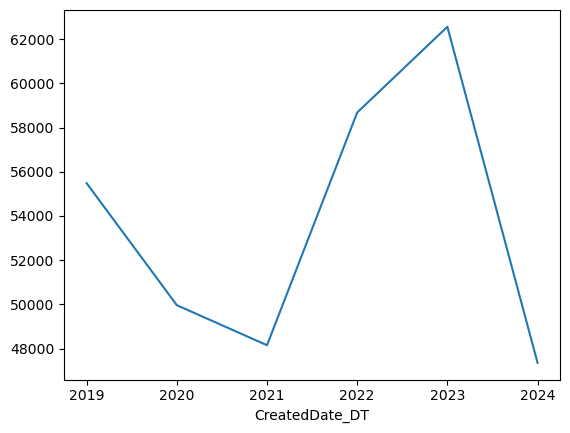

In [61]:
df['CreatedDate_DT'].dt.year.value_counts().sort_index().plot.line()

<Axes: xlabel='CreatedDate_DT'>

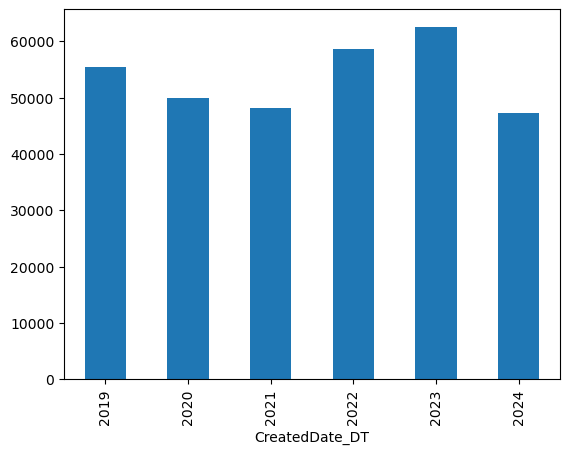

In [48]:
df['CreatedDate_DT'].dt.year.value_counts().sort_index().plot.bar()

In [62]:
#time to close ticket
df["close_time"] =  df["ClosedDate_DT"] - df["CreatedDate_DT"] 

In [63]:
df.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct,ClosedDate_DT,CreatedDate_DT,close_time
0,1-1523590871,12/31/2019 11:26:00 PM,01/14/2020 07:52:00 AM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,6.0,South Valley APC,3.0,Bob Blumenfield,13.0,CANOGA PARK NC,TOPANGA,2020-01-14 07:51:00,2019-12-31 11:26:00,13 days 20:25:00
1,1-1523576655,12/31/2019 09:27:00 PM,01/08/2020 01:42:00 PM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Self Service,Android,...,6.0,South Valley APC,12.0,John Lee,11.0,WEST HILLS NC,TOPANGA,2020-01-08 01:42:00,2019-12-31 09:27:00,7 days 16:15:00
2,1-1523574987,12/31/2019 09:17:00 PM,01/21/2020 03:26:00 PM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,2.0,South Valley APC,3.0,Bob Blumenfield,16.0,WOODLAND HILLS-WARNER CENTER NC,TOPANGA,2020-01-21 08:49:00,2019-12-31 09:17:00,20 days 23:32:00
3,1-1523570862,12/31/2019 08:35:00 PM,01/21/2020 01:30:00 PM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,2.0,South Valley APC,3.0,Bob Blumenfield,16.0,WOODLAND HILLS-WARNER CENTER NC,TOPANGA,2020-01-21 09:05:00,2019-12-31 08:35:00,21 days 00:30:00
4,1-1523570821,12/31/2019 08:33:00 PM,01/21/2020 09:41:00 AM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,2.0,South Valley APC,3.0,Bob Blumenfield,16.0,WOODLAND HILLS-WARNER CENTER NC,TOPANGA,2020-01-21 09:10:00,2019-12-31 08:33:00,21 days 00:37:00


In [24]:
type(df["close_time"][0] )

pandas._libs.tslibs.timedeltas.Timedelta

In [25]:
df["close_time"].min(), df["close_time"].max()

(Timedelta('-1 days +12:02:00'), Timedelta('1205 days 06:40:16'))

In [26]:
str(df["close_time"].max())

'1205 days 06:40:16'

In [64]:
# Regular expression pattern to find a number of days
pattern = r'(\d+)\s+days'

# Search for the pattern in the text
match = re.search(pattern, '1205 days 06:40:16')

#print(match.group(1))

df["close_time_days"] = df["close_time"].apply( lambda x: int( re.search(pattern, str(x) ).group(1)) if re.search(pattern, str(x) ) else np.nan )


In [44]:
min(df.close_time_days), max(df.close_time_days)

(0.0, 1205.0)

In [45]:
df[df['close_time_days'].isna()].head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,APC,CD,CDMember,NC,NCName,PolicePrecinct,ClosedDate_DT,CreatedDate_DT,close_time,close_time_days
158719,1-2189956241,02/02/2022 09:09:36 AM,02/02/2022 12:07:17 PM,SR Created,LASAN,Homeless Encampment,Closed,Call,ITA,NaN,...,Central APC,13.0,Mitch O'Farrell,119.0,Greater Wilshire,WILSHIRE,NaT,2022-02-02 09:09:36,NaT,NaN
159226,1-2192812001,02/04/2022 06:17:19 PM,02/06/2022 12:06:46 PM,SR Created,LASAN,Homeless Encampment,Closed,Call,Council's Office,NaN,...,North Valley APC,7.0,Monica Rodriguez,5.0,Sylmar,MISSION,NaT,2022-02-04 06:17:19,NaT,NaN
161480,1-2204554531,02/18/2022 04:18:25 PM,03/01/2022 10:38:06 PM,SR Created,LASAN,Homeless Encampment,Closed,Call,ITA,NaN,...,North Valley APC,6.0,Nury Martinez,100.0,Panorama City,MISSION,NaT,2022-02-18 04:18:25,NaT,NaN
162732,1-2212887771,02/28/2022 01:59:31 PM,03/01/2022 05:37:36 AM,SR Created,LASAN,Homeless Encampment,Closed,Call,Council's Office,NaN,...,North Valley APC,7.0,Monica Rodriguez,7.0,Pacoima,FOOTHILL,NaT,2022-02-28 01:59:31,NaT,NaN
165059,1-2234296341,03/15/2022 02:05:57 PM,03/29/2022 04:41:09 PM,SR Created,LASAN,Homeless Encampment,Closed,Call,Council's Office,NaN,...,North Valley APC,7.0,Monica Rodriguez,7.0,Pacoima,FOOTHILL,NaT,2022-03-15 02:05:57,NaT,NaN


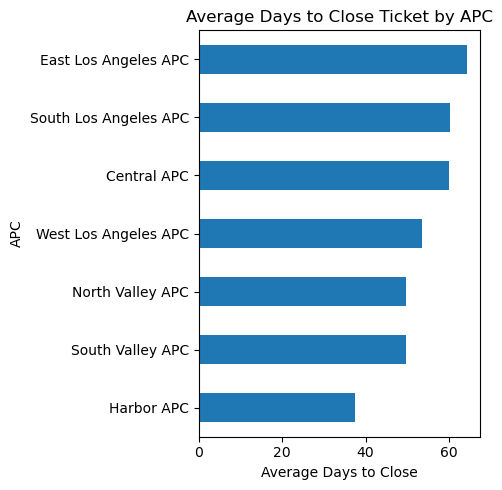

In [49]:

# plot  
plt.figure(figsize=(5, 5))
close_days_means = df[df['close_time_days'] >= 0].groupby("APC")["close_time_days"].mean()
close_days_means = close_days_means.sort_values(ascending=False)
ax = close_days_means.plot(kind="barh")
plt.xlabel('Average Days to Close')
plt.title('Average Days to Close Ticket by APC')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

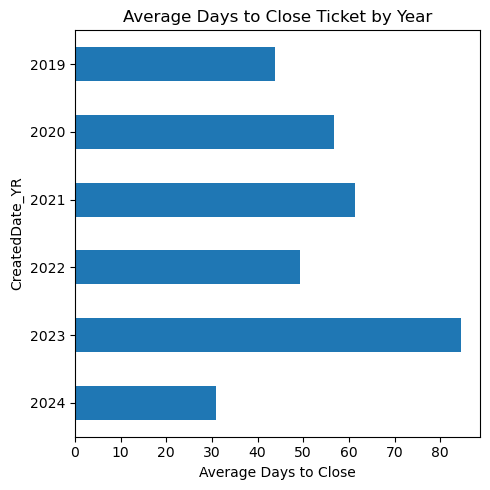

In [68]:
df["CreatedDate_YR"] = df['CreatedDate_DT'].dt.year

# plot  
plt.figure(figsize=(5, 5))
close_days_means = df[df['close_time_days'] >= 0].groupby("CreatedDate_YR")["close_time_days"].mean()
#close_days_means = close_days_means.sort_values(ascending=False)
ax = close_days_means.plot(kind="barh")
plt.xlabel('Average Days to Close')
plt.title('Average Days to Close Ticket by Year')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [70]:
#write to file with new features added for next notebook: visualization
df.to_csv(generated_data_path +'homeless_camp_closed_all_ftr_eng_1.csv', index=False)

In [69]:
df.head(1)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,CD,CDMember,NC,NCName,PolicePrecinct,ClosedDate_DT,CreatedDate_DT,close_time,close_time_days,CreatedDate_YR
0,1-1523590871,12/31/2019 11:26:00 PM,01/14/2020 07:52:00 AM,SR Created,BOS,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,3.0,Bob Blumenfield,13.0,CANOGA PARK NC,TOPANGA,2020-01-14 07:51:00,2019-12-31 11:26:00,13 days 20:25:00,13.0,2019


### Next: 2_visualization.ipynb